## Data description

There are 3 types of input features:

    Objective: factual information;
    Examination: results of medical examination;
    Subjective: information given by the patient.

Features:

    Age | Objective Feature | age | int (days)
    Height | Objective Feature | height | int (cm) |
    Weight | Objective Feature | weight | float (kg) |
    Gender | Objective Feature | gender | categorical code | gender_map={1:'female',2:'male'}
    Systolic blood pressure | Examination Feature | ap_hi | int |
    Diastolic blood pressure | Examination Feature | ap_lo | int |
    Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |
    Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |
    Smoking | Subjective Feature | smoke | binary |
    Alcohol intake | Subjective Feature | alco | binary |
    Physical activity | Subjective Feature | active | binary |
    Presence or absence of cardiovascular disease | Target Variable | cardio | binary | 0 = no 1= yes

All of the dataset values were collected at the moment of medical examination. 

## Initial data pre-processing

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df =  pd.read_csv("./Data/bmi_clean_cardio.csv", index_col= "id")
df.sample()

,age,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI,gender_2
id,,,,,,,,,,,
97438,15209,120,70.0,1,1,1,0,1,0,23.108435,1


In [3]:
df.describe()

,age,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI,gender_2
count,68681.000000,68681.000000,68681.000000,68681.000000,68681.000000,68681.000000,68681.000000,68681.000000,68681.000000,68681.000000,68681.000000
mean,19467.943827,126.868450,81.652611,1.363827,1.223788,0.088234,0.053377,0.804007,0.497561,27.312562,0.351145
std,2467.352773,16.413227,9.725984,0.678232,0.569415,0.283637,0.224786,0.396966,0.499998,4.860545,0.477332
min,10798.000000,90.000000,55.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,14.479500,0.000000
25%,17663.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,23.875115,0.000000
50%,19702.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,26.298488,0.000000
75%,21326.000000,140.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,30.103806,1.000000
max,23713.000000,220.000000,130.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,44.997166,1.000000


In [4]:
train_data =  pd.read_csv("./Data/train_bmi.csv", index_col= "id")
test_data =  pd.read_csv("./Data/test_samples.csv", index_col= "id")


### Data Cleaning

Here I:
- have changed negative ap_hi and ap_lo to positive;
- have added "0" to the end of otherwise plausible ap_hi and ap_lo values (e.g. 12 -> 120);
- have removed ap_lo < 20 which didn't seem possible to correct by muliplying by 10;
- have removed the rows with ap_hi > 250, as I haven't found any pattern in this mistake;
- have removed the rows with ap_lo = 0;
- have removed an odd "0" from ap_lo > 200 (e.g. 1000 -> 100);
- plotted weights and heights and made a conclusion, that weights < 35 and heights <100 are not trustworthy in this dataset.


## Exploratory Data Analysis

In [5]:
df["cardio"].value_counts()

0    34508
1    34173
Name: cardio, dtype: int64

<Axes: xlabel='cardio', ylabel='count'>

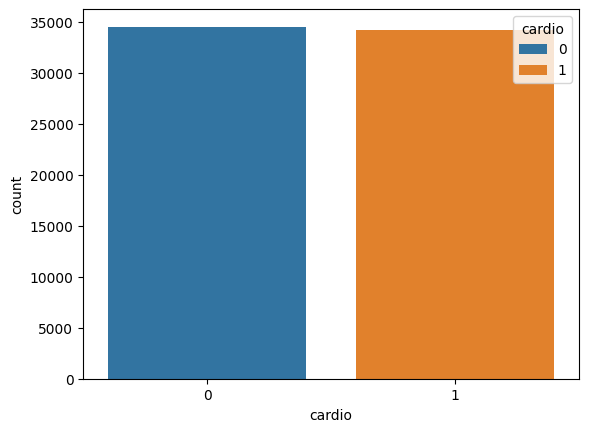

In [6]:
sns.countplot(df, x = "cardio", hue = "cardio")

The dataset looks pretty balanced.

<Axes: xlabel='cholesterol', ylabel='count'>

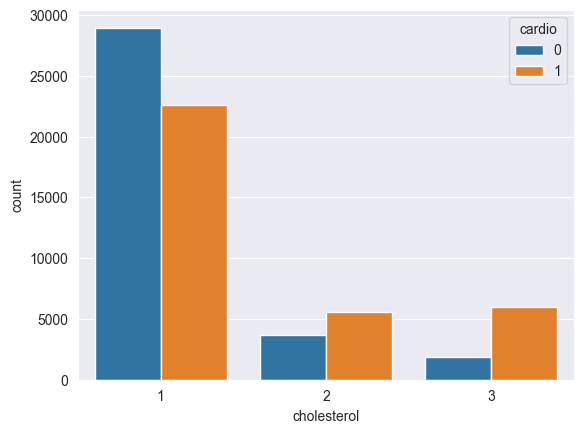

In [7]:
sns.set_style('darkgrid')
sns.countplot(df, x = "cholesterol", hue = "cardio")


In [8]:
print (f"{df.query('cholesterol == 1')['cholesterol'].count() / df['cholesterol'].count() * 100.:1f}% of people in the database have normal cholesterol")
print (f"{df.query('cholesterol == 2')['cholesterol'].count() / df['cholesterol'].count() * 100.:1f}% of people in the database have cholesterol above normal")
print (f"{df.query('cholesterol == 3')['cholesterol'].count() / df['cholesterol'].count() * 100.:1f}% of people in the database have cholesterol which is well above normal")

75.044044% of people in the database have normal cholesterol
13.529215% of people in the database have cholesterol above normal
11.426741% of people in the database have cholesterol which is well above normal


<Axes: ylabel='count'>

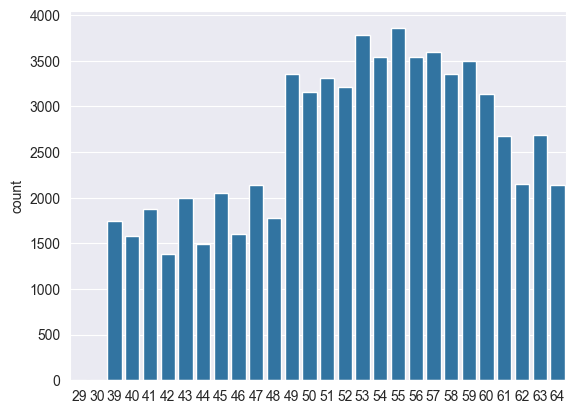

In [9]:
age = [int(value/365) for value in df["age"]]
sns.countplot(x = age)

In [10]:
print (f"The average age is {int(df['age'].mean()/365)}, with the median {int(df['age'].median()/365)} and the mode 55")

The average age is 53, with the median 53 and the mode 55


<Axes: xlabel='smoke', ylabel='count'>

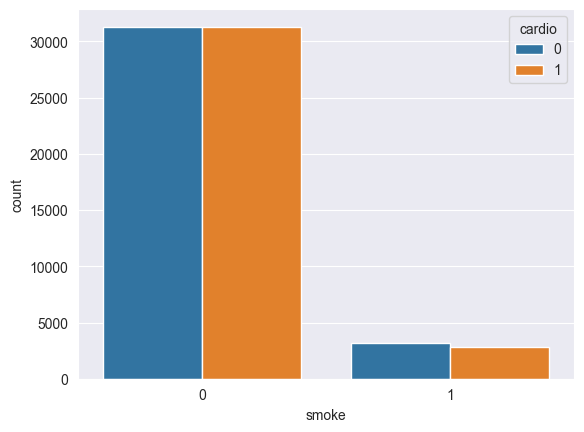

In [11]:
sns.countplot(df, x = "smoke", hue = "cardio")

In [12]:
print (f"{df.query('smoke == 1')['smoke'].count() / df['smoke'].count() * 100.:1f}% of people in the database are smokers")

8.823401% of people in the database are smokers


In [13]:
df.columns

Index(['age', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'smoke', 'alco',
       'active', 'cardio', 'BMI', 'gender_2'],
      dtype='object')

In [14]:
print (f"The procent of women having the cardiovascular disease in the dataset (to the total number of women) is {df.query('gender_2 == 0 and cardio ==1')['cardio'].count() / df.query('gender_2 == 0')['cardio'].count() * 100.:1f}%")
print (f"The procent of men having the cardiovascular disease in the dataset (to the total number of men) is {df.query('gender_2 == 1 and cardio ==1')['cardio'].count() / df.query('gender_2 == 1')['cardio'].count() * 100.:1f}%")
print (f"Overall procent of women in the dataset is {df.query('gender_2 == 0')['cardio'].count() / df['cardio'].count() * 100.:1f}%")

The procent of women having the cardiovascular disease in the dataset (to the total number of women) is 49.423301%
The procent of men having the cardiovascular disease in the dataset (to the total number of men) is 50.371108%
Overall procent of women in the dataset is 64.885485%


Correlation matrix

<Axes: >

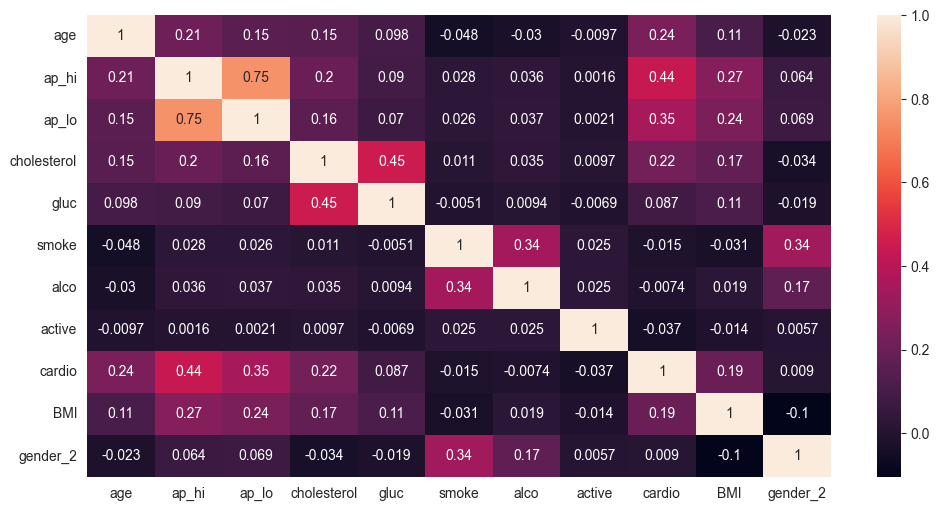

In [15]:
f, ax = plt.subplots(figsize = (12, 6))
sns.heatmap(df.corr(), annot = True)

It seems that the highest influemce on the target varible is of the following factors:
- ap_hi / ap_lo (which are highly correlated themselves), with a higher influence of ap_hi (r = 0.44)
- cholesterol (0.22), and there is also an association (r = 0.45) between cholesterol and glucose levels.  
- BMI has r = 0.19

Other factors seem to be insignificant, showing no correlation.

### Feature Engineering

***and some further removing outliers***

The source of BMI formula and ranges: [Wikipedia](https://en.wikipedia.org/wiki/Body_mass_index)

$BMI = masskg / heightm^2$

**Category 	BMI (kg/m2)**  
Underweight (Severe thinness) 	< 16.0 	  
Underweight (Moderate thinness) 	16.0 – 16.9 	  
Underweight (Mild thinness) 	17.0 – 18.4 	  
Normal range 	18.5 – 24.9 	  
Overweight (Pre-obese) 	25.0 – 29.9 	  
Obese (Class I) 	30.0 – 34.9 	  
Obese (Class II) 	35.0 – 39.9 	  
Obese (Class III) 	≥ 40.0 	  

For further removing of outliers, the boxplot and the categories of data were used. An outlier is commonly defined as the value above or below the upper or lower fences in the box plot.

By analyzing the boxplots and also charts from wikipedia, with some use of common sense, the following stage 2 cleaning took place:
-  For BMI:  
The upper fence in the box plot was 39.72, but obesety class 3 is > 40, so the data >45 was removed; the lower_fence was 14.48, so the data < 14 was also removed.
- For arterial tension, I also analyzed the difference b/w systolic and diastolic pressure:  
the rows with (ap_hi - ap_lo) < 20 or > 90 were removed;  
the rows with ap_hi < 90, or ap_lo > 130, or ap_lo < 55 were removed



***Five categories define blood pressure readings for adults***:

    1, Healthy: A healthy blood pressure reading is less than 120/80 millimeters of mercury (mm Hg).  
    2, Elevated: The systolic number is between 120 and 129 mm Hg, and the diastolic number is less than 80 mm Hg. Doctors usually don’t treat elevated blood pressure with medication.
    3, Stage 1 hypertension: The systolic number is between 130 and 139 mm Hg, or the diastolic number is between 80 and 89 mm Hg.  
    4, Stage 2 hypertension: The systolic number is 140 mm Hg or higher, or the diastolic number is 90 mm Hg or higher.  
    5, Hypertensive crisis: The systolic number is over 180 mm Hg, or the diastolic number is over 120 mm Hg. Blood pressure in this range requires urgent medical attention. 

Two datasets were then created, the first - categorial one:
```python
df_categorial = df.drop(["ap_hi", "ap_lo", "height", "weight", "BMI", "ap_difference"], axis = 1)
df_categorial = pd.get_dummies(data = df_categorial, columns = ["gender", "BMI_categories", "blood pressure range"])
```
and the second one - with bmi column:
```python
df_bmi = df.drop(["BMI_categories", "blood pressure range", "height", "weight", "ap_difference"], axis = 1)
df_bmi = pd.get_dummies(data = df_bmi, columns=["gender"], drop_first=True)
```

For the final model training the df_bmi dataset has been used, as it showed a 1% better result.

## Model training 

For honest model training process, for both datasets:
- 100 final testing points were extracted;
- the remaining data, used as training data in final stage, was additionally split into training data and test data, with test size = 0.33

In [16]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay, classification_report
from sklearn.preprocessing import StandardScaler

In [17]:
X_final_test_b, y_final_test_b = test_data.drop("cardio", axis = 1), test_data["cardio"]

X_final_train_b, y_final_train_b = train_data.drop("cardio", axis = 1), train_data["cardio"]

Also, all the algorithms used were trained both on scaled and unscaled data for both datasets (with no significant difference in result).

In [18]:
final_scaler_b = StandardScaler()
scaled_final_Xb_train = final_scaler_b.fit_transform(X_final_train_b)
scaled_final_Xb_test = final_scaler_b.transform(X_final_test_b)

For training, the following algorithms were tried:
- Logistic Regression (with and without GridSearch)
- SVM (with and without GridSearch)
- Random Forest (with and without GridSearch)
- AdaBoost (without GridSearch)
- Naive Bayes (without GridSearch)
- KNN (with GridSearch)

All the models used to show the accuracy of 0.70 - 0.73, except for the Random Forest (without GridSearch) on categorial dataset, which resulted in 0.6. 

The reason for using Logistic Regression with GridSearch as a final model is that this is a relatively calculating cheap algorithm, while processing SVM+GridSearch with n_jobs = 4 on my laptop took >= 45 minutes for one run, and there wasn't enough memory to process RandomForest+GridSearch (it had to be run on a more powerful machine, which is not easily available).

### Logistic Regression

In [19]:
from sklearn.linear_model import LogisticRegression

In [20]:
scaler = StandardScaler()
pipe_log_reg = Pipeline([("scaler", scaler), ("log", LogisticRegression(solver = "saga", multi_class = "auto", 
                                                                        max_iter = 10000, penalty = "elasticnet"))])
l1_ratio = np.linspace(0, 1, 10)
param_grid_log_reg = {"log__l1_ratio": l1_ratio}
final_model_lgr = GridSearchCV(estimator = pipe_log_reg, param_grid = param_grid_log_reg, 
                                  scoring = "balanced_accuracy", verbose = 5, n_jobs = 4)



In [21]:
final_model_lgr.fit(scaled_final_Xb_train, y_final_train_b)
yb_pred = final_model_lgr.predict(scaled_final_Xb_test)
print(classification_report(y_final_test_b, yb_pred))

Fitting 5 folds for each of 10 candidates, totalling 50 fits
              precision    recall  f1-score   support

           0       0.79      0.78      0.78        49
           1       0.79      0.80      0.80        51

    accuracy                           0.79       100
   macro avg       0.79      0.79      0.79       100
weighted avg       0.79      0.79      0.79       100



Accuracy: 0.790


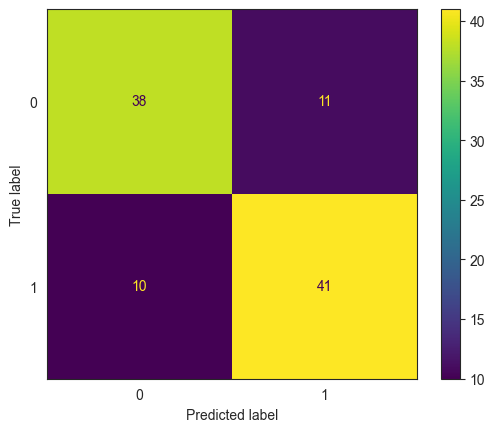

In [22]:
acc = accuracy_score (y_final_test_b, yb_pred)
print (f"Accuracy: {acc:.3f}")

sns.set_style('white')
cm = confusion_matrix (y_final_test_b, yb_pred, labels = final_model_lgr.classes_)
disp = ConfusionMatrixDisplay(cm, display_labels = final_model_lgr.classes_)
disp.plot()


In [23]:
print(final_model_lgr.best_estimator_)

Pipeline(steps=[('scaler', StandardScaler()),
                ('log',
                 LogisticRegression(l1_ratio=0.5555555555555556, max_iter=10000,
                                    penalty='elasticnet', solver='saga'))])
